## <b>Project 4 - Capstone

## Executive Summary
- In early 2021, about 1,500 healthcare workers in Singapore resigned — a sharp increase from pre-pandemic levels, especially among foreign staff. Overwork, burnout, and unused leave contributed to this trend (Channel News Asia, 2021).
- The analysis supports the Human Resource team in identifying early signs of burnout using key indicators:  
    - Stress levels  
    - Burnout frequency
    - Job Satsfaction
    - Workplace Factors
    - Mental health leave  
- These serve as leading signals before attrition occurs.

## Problem Statement

Healthcare workers are experiencing high levels of stress, burnout, and job dissatisfaction, which impact their well-being contribute to rising attrition – posing risk to both staff retention and the quality of patient care.

The goal of this analysis is to identify patterns and predictors of burnout and turnover intention, enabling department heads to take early, data-driven action to support staff and reduce attrition risk.

## Objective
- What do you want to do?  
    - Retain healthcare staff by identifying and addressing the root causes of burnout.
- Why do you want to do it?  
    - Support staff well-being through data-driven insights into mental health trends.
    - Ensure continuity and quality of patient care by maintaining a stable and engaged workforce.
    - Provide predictive tools and actionable recommendations to help department heads make informed decisions.
- Who are you doing this for?  
    - Department Heads of Healthcare Organization

## Data Source
- The dataset sourced from Kaggle is titled Healthcare Workforce Mental Health Dataset
- It has 5,000 synthetic employee records and contains key workforce-related mental health factors, including stress levels, burnout frequency, job satisfaction, mental health absences, and turnover intention. 
- These would serve as a foundation for us to explore and visualizing workplace mental health trends in the healthcare industry

## Limitation
- Synthetic Data: The dataset is artificially generated for analysis and training purposes. As such, it may not fully capture the complexities, nuances, or variability of real-world healthcare workforce behavior 
- Lack of Personal Context: The dataset does not take into consideration of employee’s personal mental health histories, life stressors, interpersonal relationships at work, or coping mechanisms. These limit the depth of analysis around burnout and attrition risk.	


<br>

# **1. Import libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report, roc_auc_score
from scipy.stats import chi2_contingency
from IPython.display import display
from matplotlib.gridspec import GridSpec
from pandas.api.types import is_numeric_dtype
import statsmodels.api as sm
import shap

<br>

# **2. Read data**

In [7]:
df = pd.read_csv('Healthcare Workforce Mental health Dataset.csv')
df

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No
...,...,...,...,...,...,...,...,...,...,...
4995,HCP-04996,Radiology Technician,Radiology,Career Stagnation,5,Occasionally,3,No,4,No
4996,HCP-04997,Registered Nurse,General Medicine,Work-Life Imbalance,7,Never,4,No,5,No
4997,HCP-04998,Critical Care Nurse,ICU,Safety Concerns,7,Occasionally,4,Yes,5,No
4998,HCP-04999,Healthcare Administrator,Administration,Career Stagnation,5,Occasionally,3,Yes,4,No


In [8]:
df.columns

Index(['Employee ID', 'Employee Type', 'Department', 'Workplace Factor',
       'Stress Level', 'Burnout Frequency', 'Job Satisfaction',
       'Access to EAPs', 'Mental Health Absences', 'Turnover Intention'],
      dtype='object')

In [9]:
## Check for Duplicates
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


In [10]:
print(df.isnull().sum())

Employee ID               0
Employee Type             0
Department                0
Workplace Factor          0
Stress Level              0
Burnout Frequency         0
Job Satisfaction          0
Access to EAPs            0
Mental Health Absences    0
Turnover Intention        0
dtype: int64


In [11]:
df.dtypes

Employee ID               object
Employee Type             object
Department                object
Workplace Factor          object
Stress Level               int64
Burnout Frequency         object
Job Satisfaction           int64
Access to EAPs            object
Mental Health Absences     int64
Turnover Intention        object
dtype: object

In [12]:
# Summary statistics
df.describe(include='all')

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
count,5000,5000,5000,5000,5000.000000,5000,5000.000000,5000,5000.000000,5000
unique,5000,10,10,8,NaN,3,NaN,2,NaN,2
top,HCP-00001,Registered Nurse,General Medicine,Heavy Workload,NaN,Often,NaN,Yes,NaN,Yes
freq,1,1283,1283,2138,NaN,2221,NaN,3594,NaN,3335
mean,NaN,NaN,NaN,NaN,7.327800,NaN,2.202200,NaN,7.396200,NaN
std,NaN,NaN,NaN,NaN,1.407673,NaN,1.045722,NaN,2.878625,NaN
min,NaN,NaN,NaN,NaN,4.000000,NaN,1.000000,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,7.000000,NaN,1.000000,NaN,5.000000,NaN
50%,NaN,NaN,NaN,NaN,8.000000,NaN,2.000000,NaN,7.000000,NaN
75%,NaN,NaN,NaN,NaN,8.000000,NaN,3.000000,NaN,9.000000,NaN


<br>

# **3. Drop features that does not affect target**

In [14]:
df.drop(columns=['Employee ID'], inplace=True)

In [15]:
df

,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No
...,...,...,...,...,...,...,...,...,...
4995,Radiology Technician,Radiology,Career Stagnation,5,Occasionally,3,No,4,No
4996,Registered Nurse,General Medicine,Work-Life Imbalance,7,Never,4,No,5,No
4997,Critical Care Nurse,ICU,Safety Concerns,7,Occasionally,4,Yes,5,No
4998,Healthcare Administrator,Administration,Career Stagnation,5,Occasionally,3,Yes,4,No


<br>

# **4. Split into training dataset and testing dataset**

In [17]:
df_train, df_test = train_test_split(df, stratify=df['Turnover Intention'], random_state=42)

In [18]:
df_train

,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
4049,Registered Nurse,General Medicine,Heavy Workload,7,Occasionally,2,Yes,8,Yes
4455,Registered Nurse,General Medicine,Heavy Workload,8,Occasionally,1,Yes,6,No
3858,Physician (General),General Practice,Work-Life Imbalance,8,Occasionally,1,Yes,5,Yes
3475,Healthcare Administrator,Administration,Poor Work Environment,6,Occasionally,4,Yes,5,Yes
4289,Healthcare Administrator,Administration,Career Stagnation,4,Occasionally,3,Yes,1,Yes
...,...,...,...,...,...,...,...,...,...
1162,Critical Care Nurse,ICU,Heavy Workload,9,Often,2,Yes,12,Yes
2786,Laboratory Technician,Laboratory,Safety Concerns,7,Never,4,Yes,7,No
276,Healthcare Administrator,Administration,Career Stagnation,5,Occasionally,3,Yes,5,No
3124,Nursing Assistant,Assisted Living,Heavy Workload,7,Occasionally,1,Yes,3,Yes


In [19]:
df_test

,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
3245,Registered Nurse,General Medicine,Poor Work Environment,7,Occasionally,4,No,10,No
1690,Registered Nurse,General Medicine,Poor Work Environment,6,Often,3,Yes,5,No
4805,Physician (Specialist),Specialty Care,Heavy Workload,8,Often,2,No,10,Yes
3645,Registered Nurse,General Medicine,Heavy Workload,9,Often,2,Yes,9,Yes
4626,Critical Care Nurse,ICU,Heavy Workload,8,Occasionally,2,Yes,8,No
...,...,...,...,...,...,...,...,...,...
4480,Registered Nurse,General Medicine,Heavy Workload,7,Occasionally,4,Yes,6,No
3665,Physician (General),General Practice,Work-Life Imbalance,9,Often,2,Yes,6,Yes
322,Nursing Assistant,Assisted Living,Heavy Workload,9,Never,2,Yes,11,Yes
4421,Laboratory Technician,Laboratory,Poor Work Environment,7,Occasionally,4,No,10,Yes


In [20]:
df_train['Turnover Intention'].value_counts(normalize=True)

Turnover Intention
Yes    0.666933
No     0.333067
Name: proportion, dtype: float64

In [21]:
df_test['Turnover Intention'].value_counts(normalize=True)

Turnover Intention
Yes    0.6672
No     0.3328
Name: proportion, dtype: float64

<br>

# **5. Function to describe numeric feature**

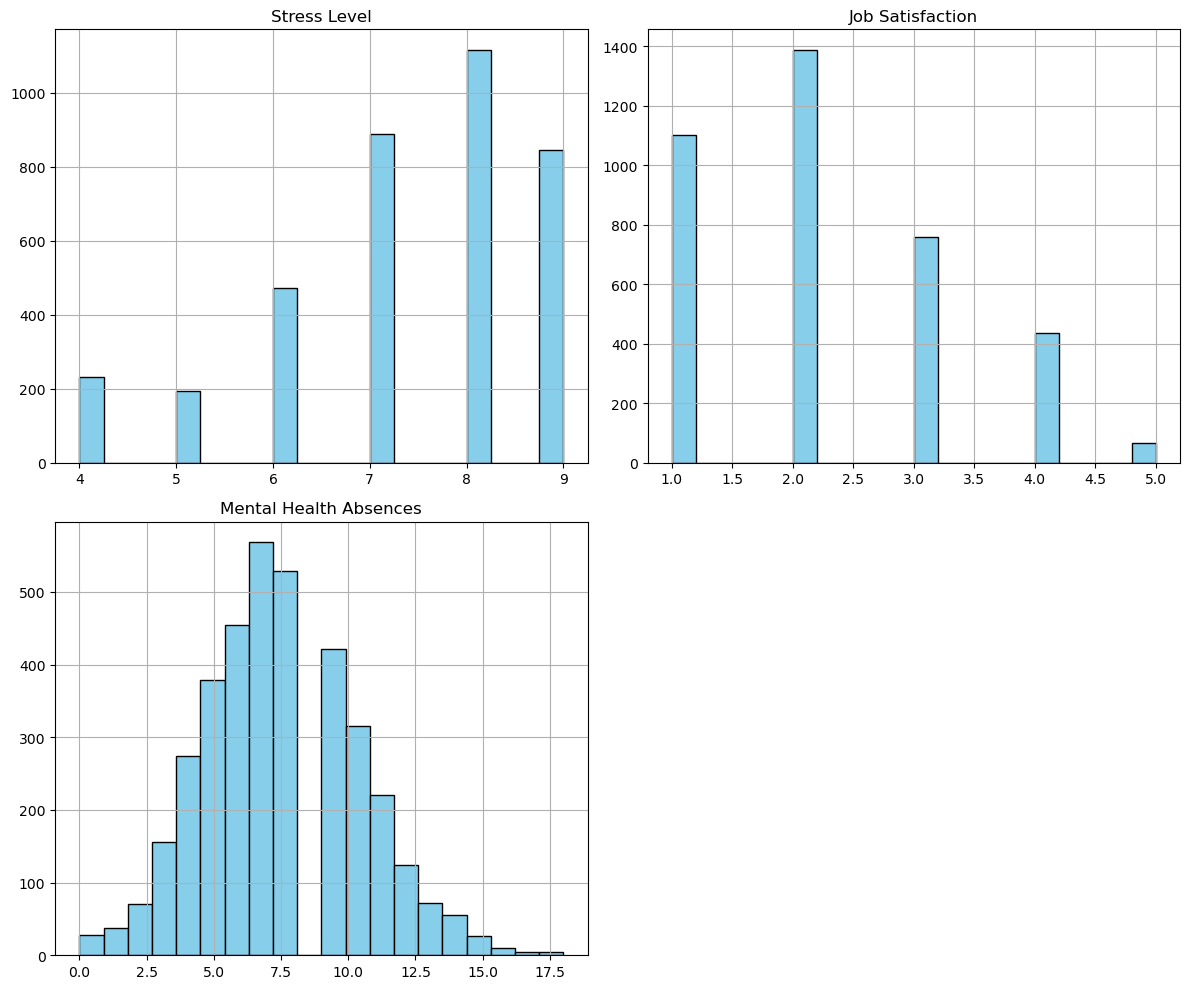

In [23]:
# Plot histogram and boxplot for numeric data

# Automatically select only the numeric columns
numeric_cols = df_train.select_dtypes(include=['number'])

# Plot histograms for each numeric column
numeric_cols.hist(
    bins=20, 
    figsize=(12, 10), 
    color='skyblue', 
    edgecolor='black'
)

# Show all the plots
plt.tight_layout()
plt.show()


In [24]:
def combined_hist_box_numeric(df):
    fig, axes = plt.subplots(1, 2, figsize=(13, 4), gridspec_kw={'width_ratios': [3, 1]})
    df.plot.hist(ax=axes[0], edgecolor='black')
    df.plot.box(ax=axes[1])
  
    plt.show()

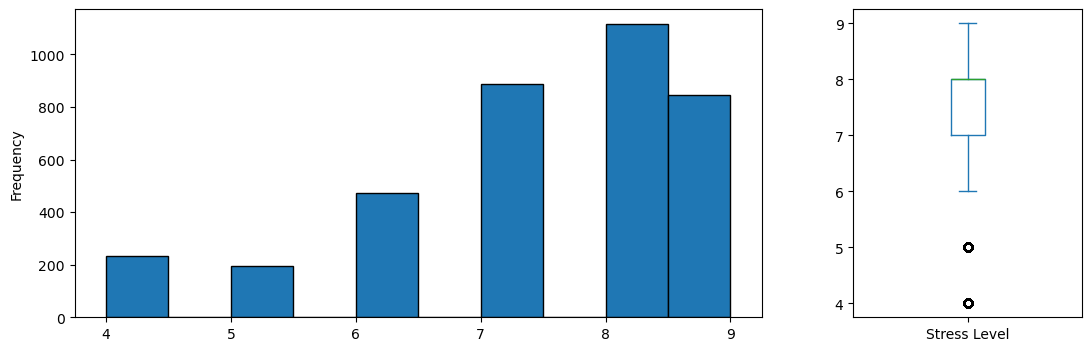

In [25]:
combined_hist_box_numeric(df_train['Stress Level'])

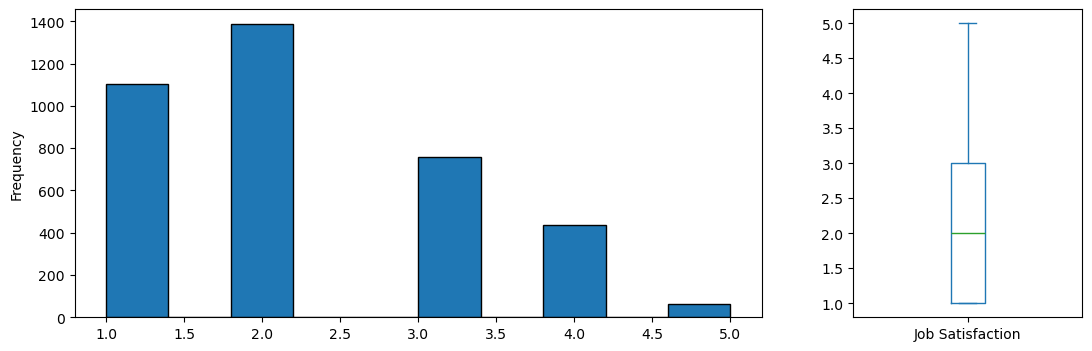

In [26]:
combined_hist_box_numeric(df_train['Job Satisfaction'])

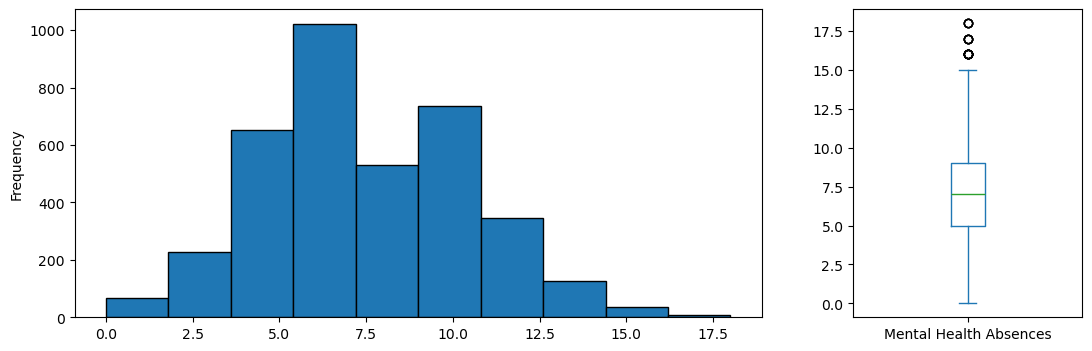

In [27]:
combined_hist_box_numeric(df_train['Mental Health Absences'])

<br>

# **6. Non-numeric feature**

In [29]:
def plot_table_and_bar_nonnum(df, column):
    counts = df[column].value_counts()

    # Plot setup
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 2]})

    # Table
    table_data = pd.DataFrame({column: counts.index, 'Count': counts.values})
    axes[0].axis('off')
    table = axes[0].table(cellText=table_data.values,
                          colLabels=table_data.columns,
                          cellLoc='center',
                          loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1.2, 1.2)

    # Bar Chart
    counts.plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
    axes[1].set_title(f'Distribution of {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

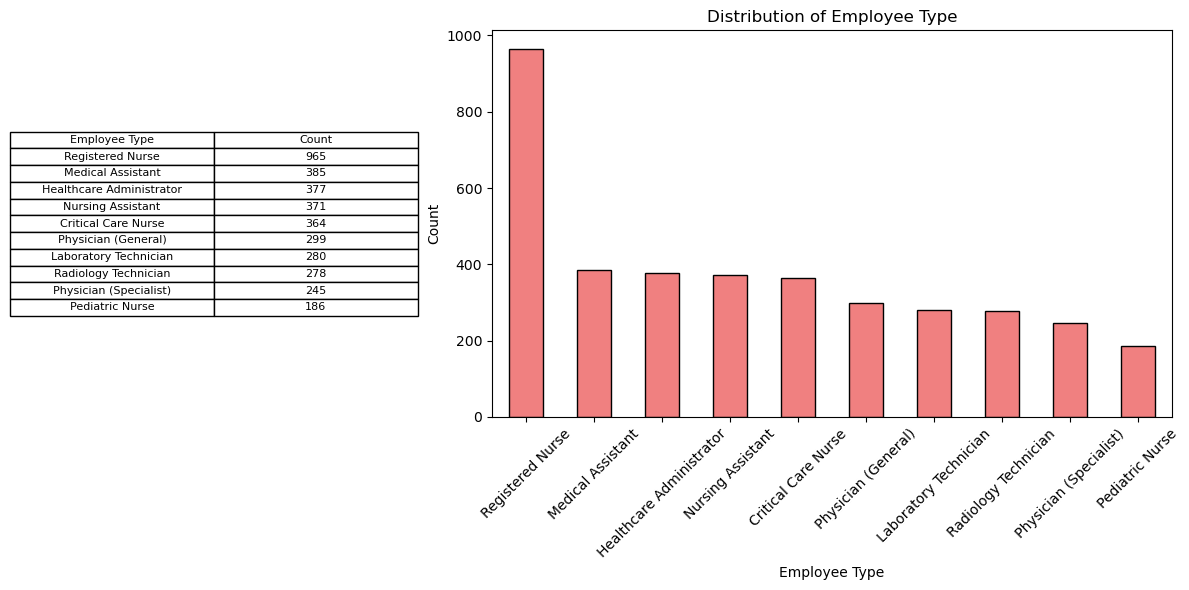

In [30]:
plot_table_and_bar_nonnum(df_train, 'Employee Type')

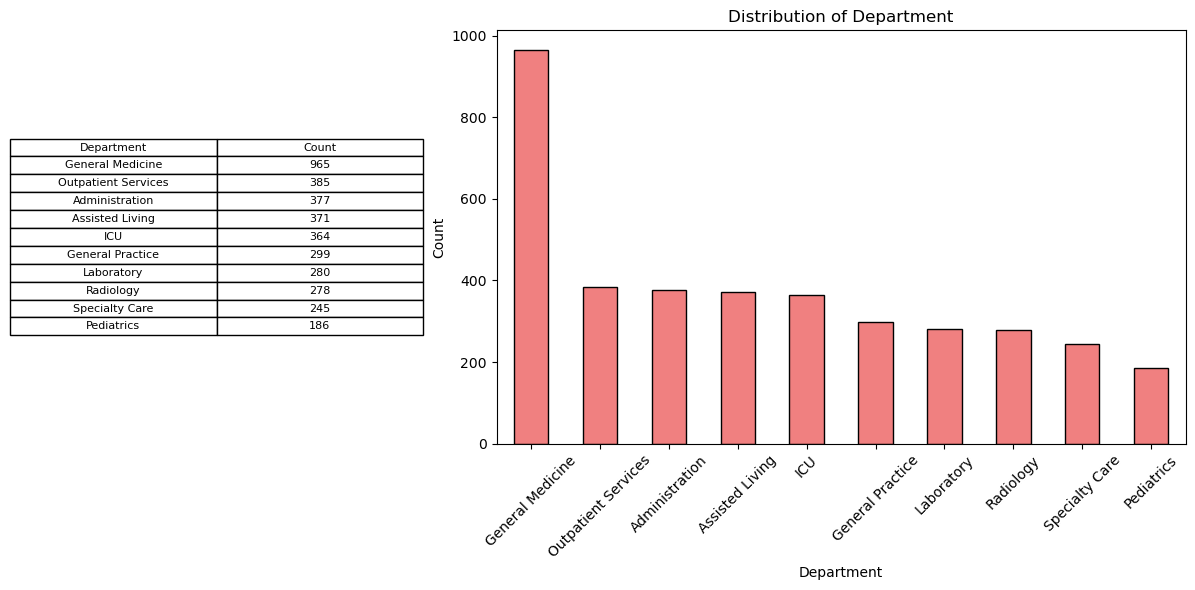

In [31]:
plot_table_and_bar_nonnum(df_train, 'Department')

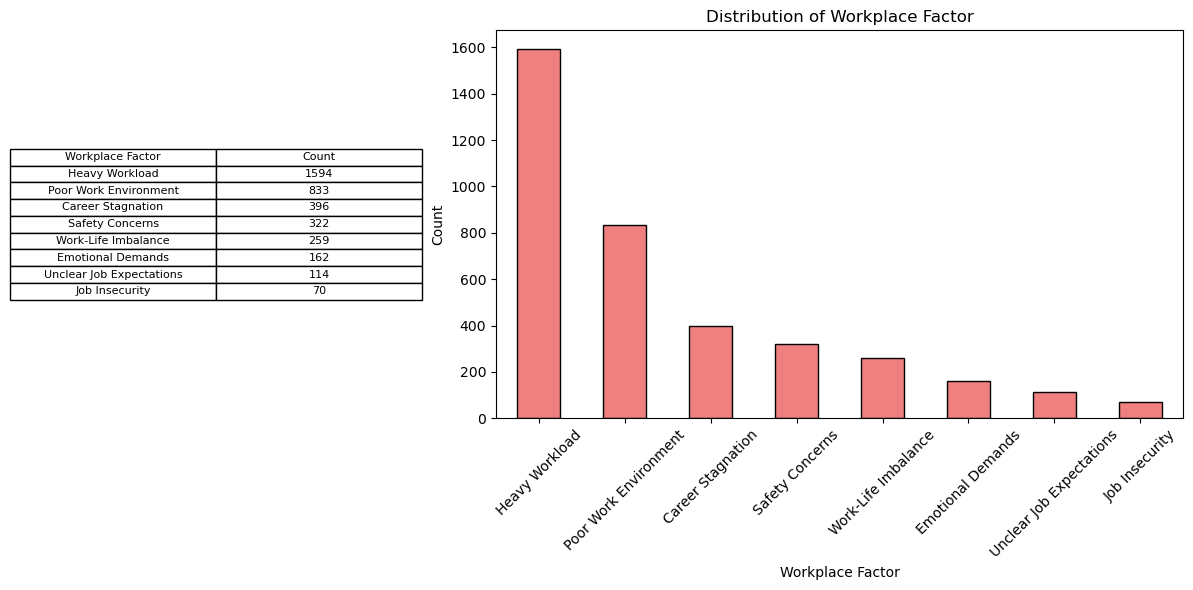

In [32]:
plot_table_and_bar_nonnum(df_train, 'Workplace Factor')

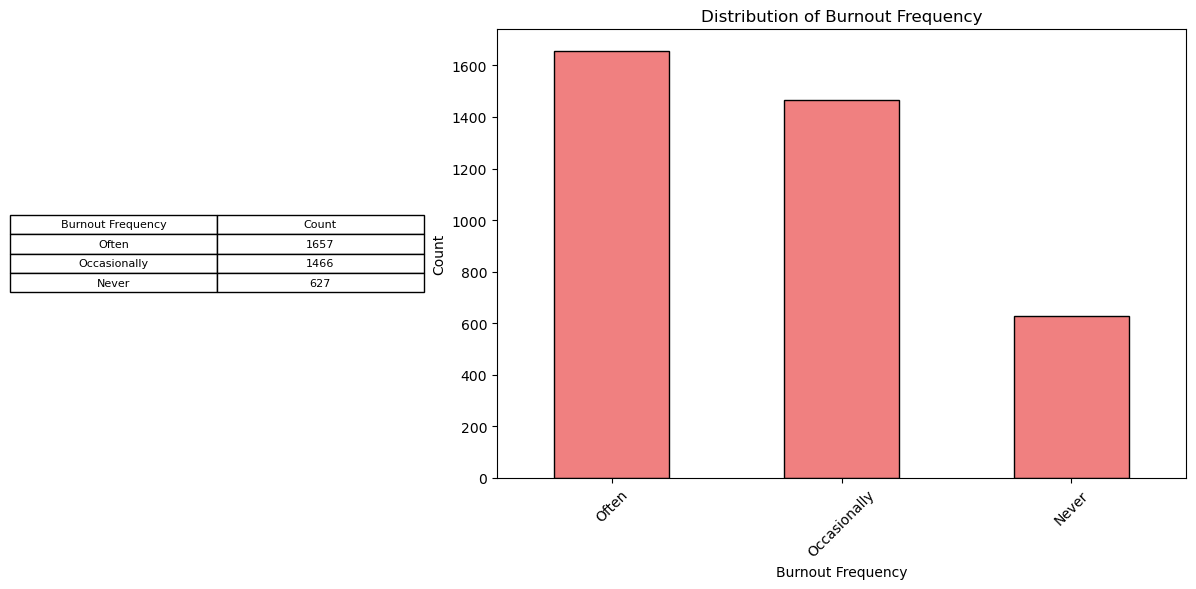

In [33]:
plot_table_and_bar_nonnum(df_train, 'Burnout Frequency')

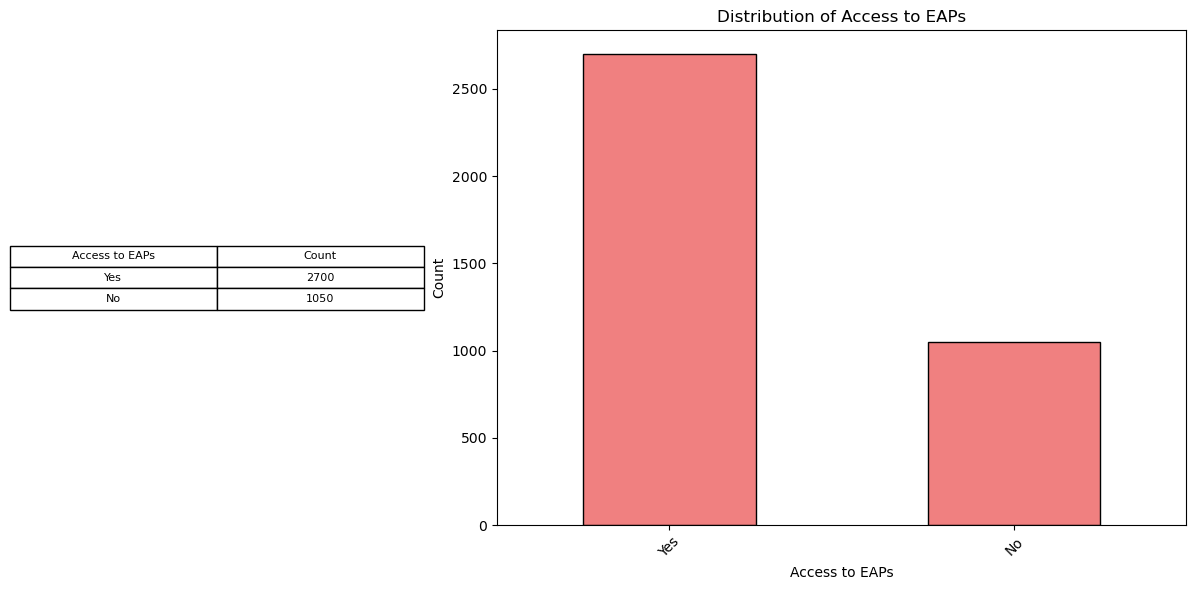

In [34]:
plot_table_and_bar_nonnum(df_train, 'Access to EAPs')

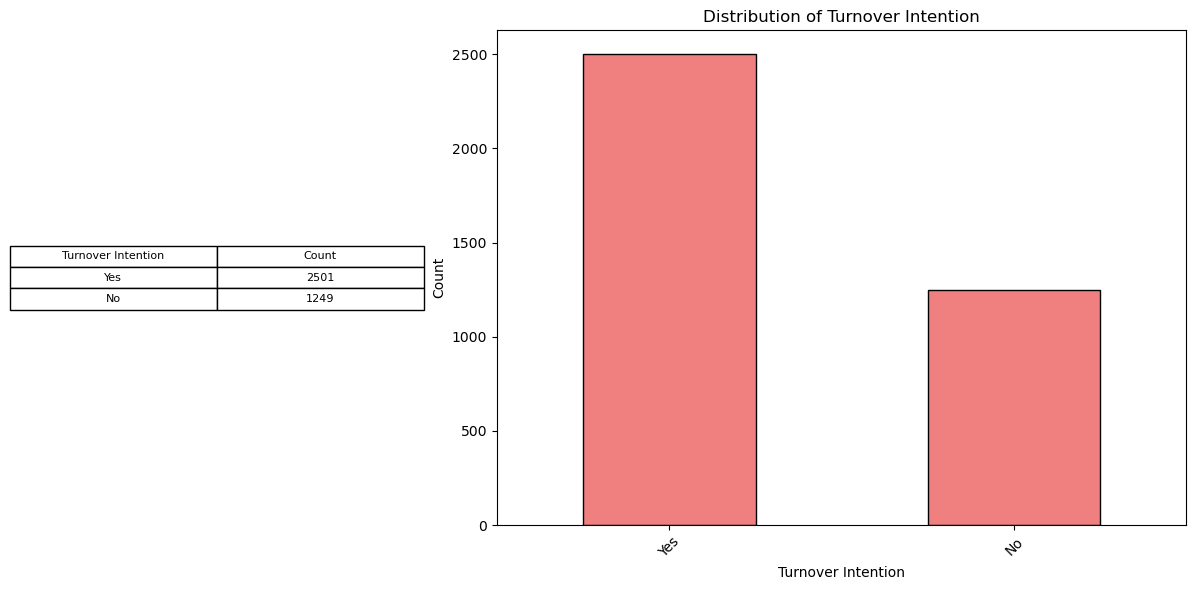

In [35]:
plot_table_and_bar_nonnum(df_train, 'Turnover Intention')

<br>

# **7. Exploratory data analysis**

In [37]:
df_train.shape

(3750, 9)

In [38]:
df_train.describe()

,Stress Level,Job Satisfaction,Mental Health Absences
count,3750.000000,3750.000000,3750.000000
mean,7.332267,2.192533,7.424533
std,1.407596,1.039496,2.884832
min,4.000000,1.000000,0.000000
25%,7.000000,1.000000,5.000000
50%,8.000000,2.000000,7.000000
75%,8.000000,3.000000,9.000000
max,9.000000,5.000000,18.000000


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3750 entries, 4049 to 3681
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Employee Type           3750 non-null   object
 1   Department              3750 non-null   object
 2   Workplace Factor        3750 non-null   object
 3   Stress Level            3750 non-null   int64 
 4   Burnout Frequency       3750 non-null   object
 5   Job Satisfaction        3750 non-null   int64 
 6   Access to EAPs          3750 non-null   object
 7   Mental Health Absences  3750 non-null   int64 
 8   Turnover Intention      3750 non-null   object
dtypes: int64(3), object(6)
memory usage: 293.0+ KB


<b> For numeric feature

- Stress Level: The majority of healthcare employees reported high stress levels, typically ranging between 8 and 9 on a 10-point scale.

- Job Satisfaction: Most staff rated their job satisfaction as 2 out of 5, indicating generally low morale across the workforce.

- Mental Health Absences: A significant portion of staff took between 5 to 7.5 days of mental health-related leave, suggesting widespread mental strain.

<b> For Non-numeric features

- Employee Type and Department: These two fields appear to contain overlapping information, as each employee’s type is uniquely tied to a specific department. Due to redundancy, only one of these columns was retained for analysis.

- Workplace Factor Related to Turnover Intention: The most frequently cited factor contributing to turnover intention is "heavy workload."

- Burnout Frequency: Burnout is a widespread issue across the organization as more than 80% experience occasional or frequent burnout episodes.

- Access to Employee Assistance Programs (EAPs): 72% of employees reported having access to EAPs, indicating that while support is available to a majority, 28% of employees remain without access. This presents an opportunity for expanding EAP availability to improve mental health outcomes.

- Turnover Intention: Approximately 66% of employees expressed an intention to leave their current roles. This reflects challenges in workforce retention and the needs to address burnout and job dissatisfaction.

# **8.1. Data manipulation on df_train.**

In [43]:
df_train.dtypes

Employee Type             object
Department                object
Workplace Factor          object
Stress Level               int64
Burnout Frequency         object
Job Satisfaction           int64
Access to EAPs            object
Mental Health Absences     int64
Turnover Intention        object
dtype: object

<b> For Non-numeric features

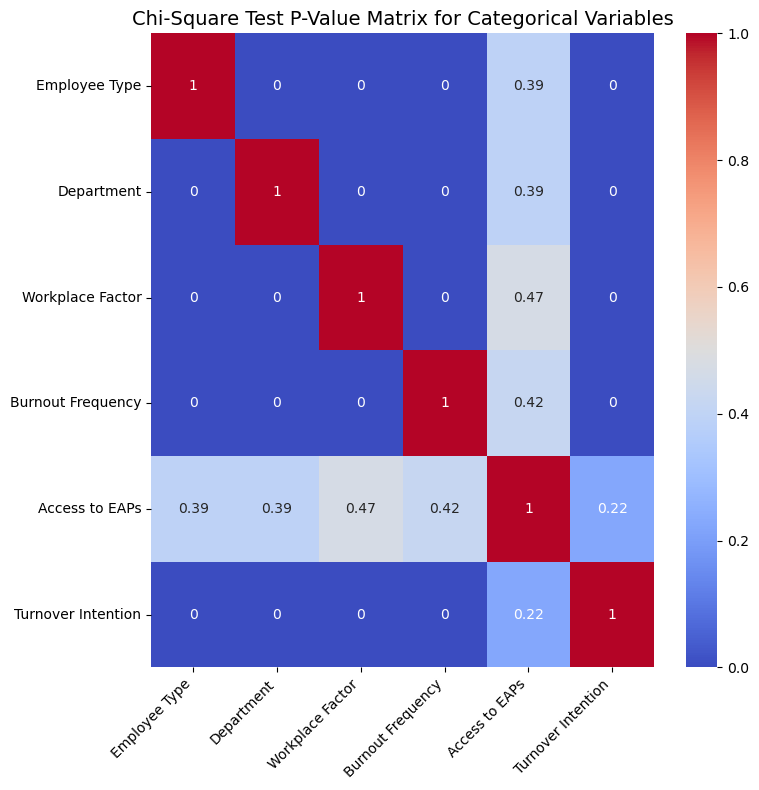

In [45]:
# Chi-square test P-value for non-numeric variables to test if there's a significant relationship between two categorical variables
non_numeric_columns = ['Employee Type','Department','Workplace Factor','Burnout Frequency','Access to EAPs','Turnover Intention']
p_value_matrix = pd.DataFrame(index=non_numeric_columns, columns=non_numeric_columns)

for col_1 in non_numeric_columns:
    for col_2 in non_numeric_columns:
        if col_1 == col_2:
            p_value_matrix.loc[col_1, col_2] = 1
        else:
            contingency_table = pd.crosstab(df_train[col_1], df_train[col_2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            p_value_matrix.loc[col_1, col_2] = round(p, 4)

p_value_matrix = p_value_matrix.astype(float)

plt.figure(figsize=(8, 8))  # You can adjust the size as needed
sns.heatmap(p_value_matrix, annot=True, cmap='coolwarm')
plt.title("Chi-Square Test P-Value Matrix for Categorical Variables", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better spacing
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

#A small p-value (e.g., < 0.05) means it's unlikely that the observed difference is due to random chance → there is a significant relationship.

<b> For numeric feature

C:\Users\USER\AppData\Local\Temp\ipykernel_16640\2027015648.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Turnover Intention', y='Stress Level', data=df_train, palette='Set2')


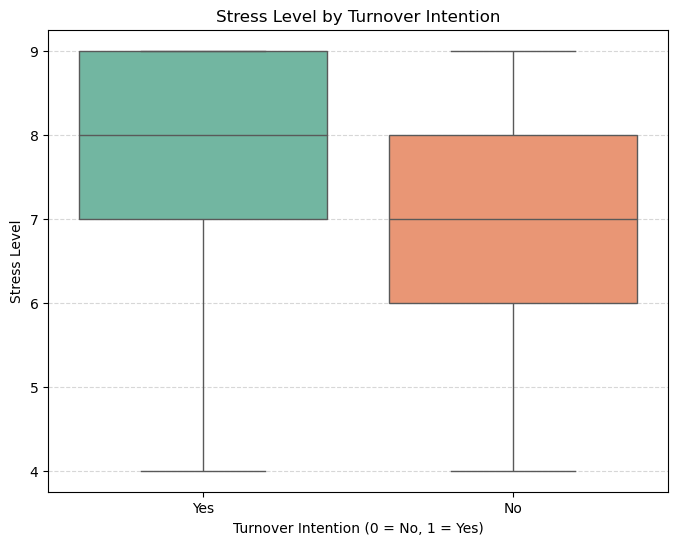

In [47]:
#ANOVA analysis for numeric variables to check if the average (mean) of a numeric feature is different across multiple groups

df_train['Turnover Intention'] = df_train['Turnover Intention'].astype(str)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Turnover Intention', y='Stress Level', data=df_train, palette='Set2')

plt.title('Stress Level by Turnover Intention')
plt.xlabel('Turnover Intention (0 = No, 1 = Yes)')
plt.ylabel('Stress Level')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


In [48]:
from scipy.stats import f_oneway

# Create groups
group_0 = df_train[df_train['Turnover Intention'] == 'No']['Stress Level']
group_1 = df_train[df_train['Turnover Intention'] == 'Yes']['Stress Level']

# Perform ANOVA
f_stat, p_value = f_oneway(group_0, group_1)

# Print results
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"P-value: {round(p_value,2)}")

# Optional: Interpret
if p_value < 0.05:
    print("✅ The difference in stress level between the groups is statistically significant.")
else:
    print("⚠️ No statistically significant difference in stress level between the groups.")


#A small p-value (e.g., < 0.05) means at least one group’s mean is significantly different from the others.
#A large p-value means no significant difference between group means.

ANOVA F-statistic: 256.0254
P-value: 0.0
✅ The difference in stress level between the groups is statistically significant.


C:\Users\USER\AppData\Local\Temp\ipykernel_16640\3133341089.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Turnover Intention', y='Job Satisfaction', data=df_train, palette='Set2')


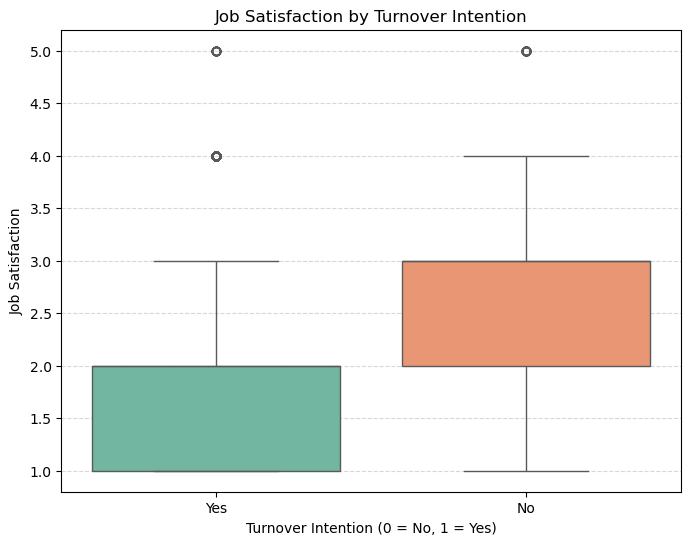

In [49]:
df_train['Turnover Intention'] = df_train['Turnover Intention'].astype(str)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Turnover Intention', y='Job Satisfaction', data=df_train, palette='Set2')

plt.title('Job Satisfaction by Turnover Intention')
plt.xlabel('Turnover Intention (0 = No, 1 = Yes)')
plt.ylabel('Job Satisfaction')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


In [50]:
# Create groups
group_0 = df_train[df_train['Turnover Intention'] == 'No']['Job Satisfaction']
group_1 = df_train[df_train['Turnover Intention'] == 'Yes']['Job Satisfaction']

# Perform ANOVA
f_stat, p_value = f_oneway(group_0, group_1)

# Print results
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"P-value: {round(p_value,4)}")

# Optional: Interpret
if p_value < 0.05:
    print("✅ The difference in Job Satisfaction between the groups is statistically significant.")
else:
    print("⚠️ No statistically significant difference in Job Satisfaction between the groups.")

#A small p-value (e.g., < 0.05) means at least one group’s mean is significantly different from the others.
#A large p-value means no significant difference between group means.

ANOVA F-statistic: 572.1792
P-value: 0.0
✅ The difference in Job Satisfaction between the groups is statistically significant.


C:\Users\USER\AppData\Local\Temp\ipykernel_16640\3512761386.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Turnover Intention', y='Mental Health Absences', data=df_train, palette='Set2')


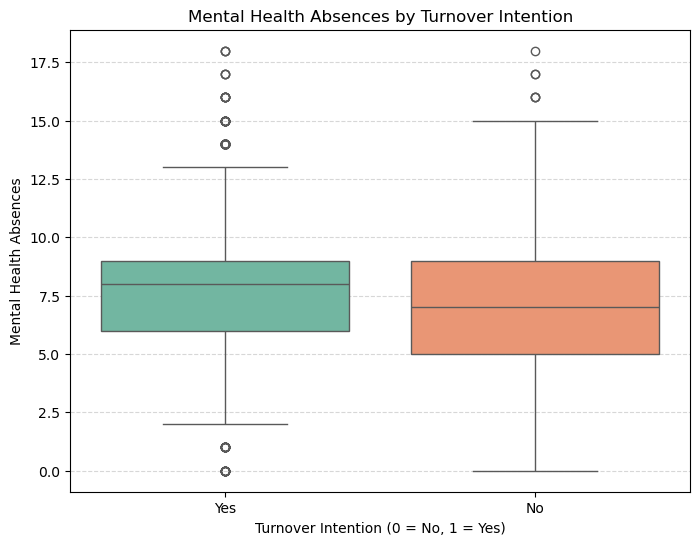

In [51]:
df_train['Turnover Intention'] = df_train['Turnover Intention'].astype(str)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Turnover Intention', y='Mental Health Absences', data=df_train, palette='Set2')

plt.title('Mental Health Absences by Turnover Intention')
plt.xlabel('Turnover Intention (0 = No, 1 = Yes)')
plt.ylabel('Mental Health Absences')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [52]:
group_0 = df_train[df_train['Turnover Intention'] == 'No']['Mental Health Absences']
group_1 = df_train[df_train['Turnover Intention'] == 'Yes']['Mental Health Absences']

# Perform ANOVA
f_stat, p_value = f_oneway(group_0, group_1)

# Print results
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"P-value: {round(p_value,4)}")

# Optional: Interpret
if p_value < 0.05:
    print("✅ The difference in Mental Health Absences between the groups is statistically significant.")
else:
    print("⚠️ No statistically significant difference in Mental Health Absences between the groups.")

#A small p-value (e.g., < 0.05) means at least one group’s mean is significantly different from the others.
#A large p-value means no significant difference between group means.

ANOVA F-statistic: 40.0570
P-value: 0.0
✅ The difference in Mental Health Absences between the groups is statistically significant.


In [53]:
#I am curious if Mental Health Absences is co-related to Turnover Intention
# Assuming 'Yes' = 1 (intends to leave), 'No' = 0 (intends to stay)
df_train['turnover_binary'] = df_train['Turnover Intention'].map({'Yes': 1, 'No': 0})

from scipy.stats import pointbiserialr

# Run the test
correlation, p_value = pointbiserialr(df_train['turnover_binary'], df_train['Mental Health Absences'])

print(f"📈 Point Biserial Correlation: {correlation:.4f}")
print(f"📊 P-value: {p_value:.4f}")

📈 Point Biserial Correlation: 0.1028
📊 P-value: 0.0000


The positive value (0.1028) means that as mental health absences increase, the likelihood of turnover also slightly increases.
However, 0.10 is a weak correlation. It's statistically significant (because your dataset is probably large), but the relationship is not strong

In [55]:
#Department column is dropped as specified employee type belongs to specific department
df_train = df_train.drop(columns=['Department', 'turnover_binary'])
df_train

,Employee Type,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
4049,Registered Nurse,Heavy Workload,7,Occasionally,2,Yes,8,Yes
4455,Registered Nurse,Heavy Workload,8,Occasionally,1,Yes,6,No
3858,Physician (General),Work-Life Imbalance,8,Occasionally,1,Yes,5,Yes
3475,Healthcare Administrator,Poor Work Environment,6,Occasionally,4,Yes,5,Yes
4289,Healthcare Administrator,Career Stagnation,4,Occasionally,3,Yes,1,Yes
...,...,...,...,...,...,...,...,...
1162,Critical Care Nurse,Heavy Workload,9,Often,2,Yes,12,Yes
2786,Laboratory Technician,Safety Concerns,7,Never,4,Yes,7,No
276,Healthcare Administrator,Career Stagnation,5,Occasionally,3,Yes,5,No
3124,Nursing Assistant,Heavy Workload,7,Occasionally,1,Yes,3,Yes


In [56]:
# Save to CSV file in case you want to use Tableau or MS Power BI to visualise
df_train.to_csv('health_train.csv', index=False)

<br>

# **8.2. One hot encoding on df_train**

In [58]:
# This is for non-numeric features.
# Can also use for features with just 0 and 1.

In [59]:
df_train.dtypes

Employee Type             object
Workplace Factor          object
Stress Level               int64
Burnout Frequency         object
Job Satisfaction           int64
Access to EAPs            object
Mental Health Absences     int64
Turnover Intention        object
dtype: object

In [60]:
categorical_features = ['Employee Type', 'Workplace Factor', 
                        'Burnout Frequency', 'Access to EAPs']

# Initialize encoder
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(df_train[categorical_features])

# Create DataFrame with encoded column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_features))

# Preview the result
encoded_df

,Employee Type_Healthcare Administrator,Employee Type_Laboratory Technician,Employee Type_Medical Assistant,Employee Type_Nursing Assistant,Employee Type_Pediatric Nurse,Employee Type_Physician (General),Employee Type_Physician (Specialist),Employee Type_Radiology Technician,Employee Type_Registered Nurse,Workplace Factor_Emotional Demands,Workplace Factor_Heavy Workload,Workplace Factor_Job Insecurity,Workplace Factor_Poor Work Environment,Workplace Factor_Safety Concerns,Workplace Factor_Unclear Job Expectations,Workplace Factor_Work-Life Imbalance,Burnout Frequency_Occasionally,Burnout Frequency_Often,Access to EAPs_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3746,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3747,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3748,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [61]:
df_train.reset_index(drop=True)

,Employee Type,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,Registered Nurse,Heavy Workload,7,Occasionally,2,Yes,8,Yes
1,Registered Nurse,Heavy Workload,8,Occasionally,1,Yes,6,No
2,Physician (General),Work-Life Imbalance,8,Occasionally,1,Yes,5,Yes
3,Healthcare Administrator,Poor Work Environment,6,Occasionally,4,Yes,5,Yes
4,Healthcare Administrator,Career Stagnation,4,Occasionally,3,Yes,1,Yes
...,...,...,...,...,...,...,...,...
3745,Critical Care Nurse,Heavy Workload,9,Often,2,Yes,12,Yes
3746,Laboratory Technician,Safety Concerns,7,Never,4,Yes,7,No
3747,Healthcare Administrator,Career Stagnation,5,Occasionally,3,Yes,5,No
3748,Nursing Assistant,Heavy Workload,7,Occasionally,1,Yes,3,Yes


<br>

# **8.3. Scaling on df_train**

In [63]:
# Your numeric columns to scale
numeric_features = ['Stress Level', 'Job Satisfaction', 'Mental Health Absences']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform numeric columns
scaled_array = scaler.fit_transform(df_train[numeric_features])

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_array, columns=numeric_features)

# Preview
scaled_df

,Stress Level,Job Satisfaction,Mental Health Absences
0,0.6,0.25,0.444444
1,0.8,0.00,0.333333
2,0.8,0.00,0.277778
3,0.4,0.75,0.277778
4,0.0,0.50,0.055556
...,...,...,...
3745,1.0,0.25,0.666667
3746,0.6,0.75,0.388889
3747,0.2,0.50,0.277778
3748,0.6,0.00,0.166667


<br>

# **8.4. Combine into df_train_final**

In [65]:
df_train_final = pd.concat([encoded_df, scaled_df, df_train['Turnover Intention'].reset_index(drop=True)], axis=1)
df_train_final

,Employee Type_Healthcare Administrator,Employee Type_Laboratory Technician,Employee Type_Medical Assistant,Employee Type_Nursing Assistant,Employee Type_Pediatric Nurse,Employee Type_Physician (General),Employee Type_Physician (Specialist),Employee Type_Radiology Technician,Employee Type_Registered Nurse,Workplace Factor_Emotional Demands,...,Workplace Factor_Safety Concerns,Workplace Factor_Unclear Job Expectations,Workplace Factor_Work-Life Imbalance,Burnout Frequency_Occasionally,Burnout Frequency_Often,Access to EAPs_Yes,Stress Level,Job Satisfaction,Mental Health Absences,Turnover Intention
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.6,0.25,0.444444,Yes
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.8,0.00,0.333333,No
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.8,0.00,0.277778,Yes
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.4,0.75,0.277778,Yes
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.50,0.055556,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.25,0.666667,Yes
3746,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.6,0.75,0.388889,No
3747,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.2,0.50,0.277778,No
3748,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.6,0.00,0.166667,Yes


In [66]:
X_train = df_train_final.drop(columns=['Turnover Intention'])
y_train = df_train_final['Turnover Intention']
actual_y_train_category = y_train

In [67]:
# Convert y_train to binary if it contains 'Yes'/'No'
y_train_binary = y_train.map({'Yes': 1, 'No': 0})

<br>

# **9.1. Model 1 - Logistic regression fit (Train Set)**

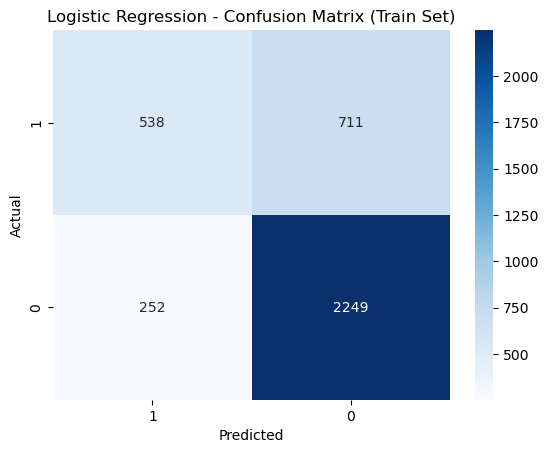


📋 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.43      0.53      1249
           1       0.76      0.90      0.82      2501

    accuracy                           0.74      3750
   macro avg       0.72      0.66      0.68      3750
weighted avg       0.73      0.74      0.73      3750



In [69]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train_binary)

# Predict on the training data
y_pred = log_reg.predict(X_train)

# Evaluate the model
cm = confusion_matrix(y_train_binary, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,0],yticklabels=[1,0])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix (Train Set)')
plt.show()

print("\n📋 Classification Report:\n", classification_report(y_train_binary, y_pred))

In [70]:
print("Accuracy :", accuracy_score(y_train_binary, y_pred))
print("Precision :", precision_score(y_train_binary, y_pred))
print("Recall :", recall_score(y_train_binary, y_pred))

Accuracy : 0.7432
Precision : 0.7597972972972973
Recall : 0.8992403038784487


<br>

# **9.2. Model 2 - KNN (Train Set)**

C:\Users\USER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\USER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\USER\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

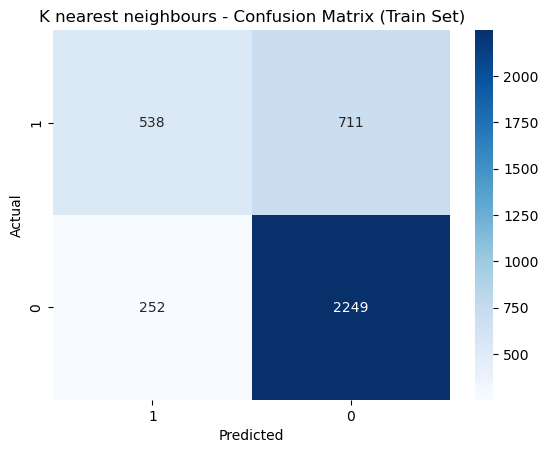

🔍 Accuracy on training set: 0.7824

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.56      0.63      1249
           1       0.80      0.90      0.85      2501

    accuracy                           0.78      3750
   macro avg       0.76      0.73      0.74      3750
weighted avg       0.78      0.78      0.77      3750



In [72]:
# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_binary)

# Predict (on the same training set or test set if available)
y_pred = knn.predict(X_train)

# Evaluate
cm_knn = confusion_matrix(y_train_binary, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,0],yticklabels=[1,0])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K nearest neighbours - Confusion Matrix (Train Set)')
plt.show()

print("🔍 Accuracy on training set:", accuracy_score(y_train_binary, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_train_binary, y_pred))

<br>

# **9.3. Model 3 - Random Forest Model (Train Set)**

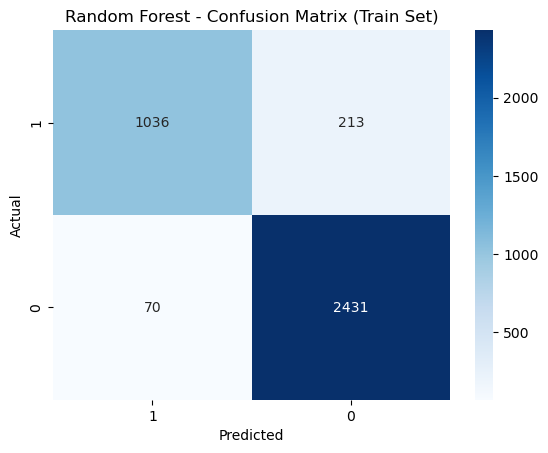


📋 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      1249
           1       0.92      0.97      0.94      2501

    accuracy                           0.92      3750
   macro avg       0.93      0.90      0.91      3750
weighted avg       0.93      0.92      0.92      3750



In [74]:
# Train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_binary)

# Predict
y_train_pred_rf = rf.predict(X_train)
y_train_proba_rf = rf.predict_proba(X_train)[:, 1]

# Evaluate
acc = accuracy_score(y_train_binary, y_train_pred_rf)
roc = roc_auc_score(y_train_binary, y_train_proba_rf)

# Confusion Matrix
cm_rf= confusion_matrix(y_train_binary, y_train_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=[1,0],yticklabels=[1,0])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix (Train Set)')
plt.show()

# Classification Report
print("\n📋 Classification Report:\n", classification_report(y_train_binary, y_train_pred_rf))

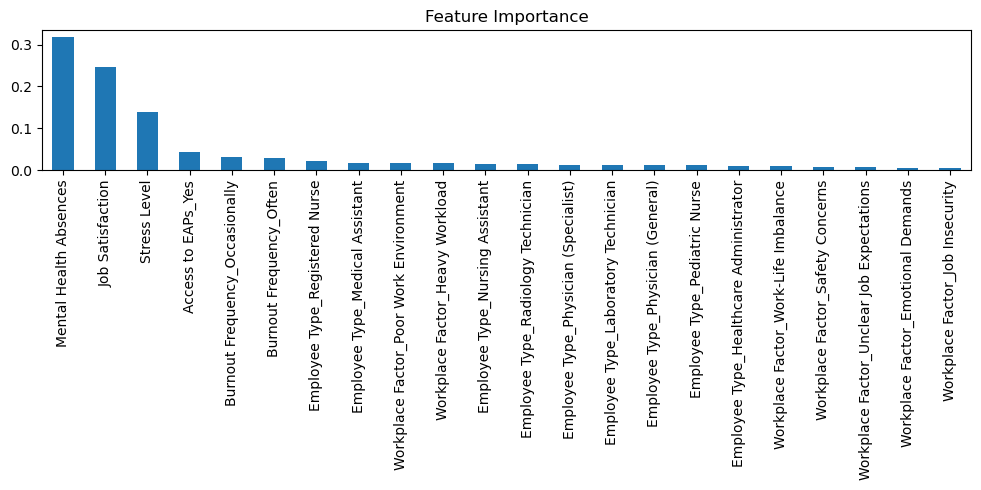

In [75]:
importances = rf.feature_importances_
feat_names = X_train.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

feat_imp.plot(kind='bar', figsize=(10, 5), title='Feature Importance')
plt.tight_layout()
plt.show()

<br>

# **10.1. Data manipulation on df_test** </font>

In [77]:
df_test.dtypes

Employee Type             object
Department                object
Workplace Factor          object
Stress Level               int64
Burnout Frequency         object
Job Satisfaction           int64
Access to EAPs            object
Mental Health Absences     int64
Turnover Intention        object
dtype: object

In [78]:
df_test = df_test.drop(columns=['Department'])

In [79]:
df_test

,Employee Type,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
3245,Registered Nurse,Poor Work Environment,7,Occasionally,4,No,10,No
1690,Registered Nurse,Poor Work Environment,6,Often,3,Yes,5,No
4805,Physician (Specialist),Heavy Workload,8,Often,2,No,10,Yes
3645,Registered Nurse,Heavy Workload,9,Often,2,Yes,9,Yes
4626,Critical Care Nurse,Heavy Workload,8,Occasionally,2,Yes,8,No
...,...,...,...,...,...,...,...,...
4480,Registered Nurse,Heavy Workload,7,Occasionally,4,Yes,6,No
3665,Physician (General),Work-Life Imbalance,9,Often,2,Yes,6,Yes
322,Nursing Assistant,Heavy Workload,9,Never,2,Yes,11,Yes
4421,Laboratory Technician,Poor Work Environment,7,Occasionally,4,No,10,Yes


In [80]:
# Save to CSV file in case you want to use Tableau or MS Power BI to visualise
#df_test.to_csv('health_test.csv', index=False)

<br>

# **10.2. One hot encoding on df_test**

In [82]:
categorical_features = ['Employee Type', 'Workplace Factor', 
                        'Burnout Frequency', 'Access to EAPs']

# Fit and transform the categorical columns
encoded_array = encoder.transform(df_test[categorical_features])

# Create DataFrame with encoded column names
encoded_dftest = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_features))

# Preview the result
encoded_dftest

,Employee Type_Healthcare Administrator,Employee Type_Laboratory Technician,Employee Type_Medical Assistant,Employee Type_Nursing Assistant,Employee Type_Pediatric Nurse,Employee Type_Physician (General),Employee Type_Physician (Specialist),Employee Type_Radiology Technician,Employee Type_Registered Nurse,Workplace Factor_Emotional Demands,Workplace Factor_Heavy Workload,Workplace Factor_Job Insecurity,Workplace Factor_Poor Work Environment,Workplace Factor_Safety Concerns,Workplace Factor_Unclear Job Expectations,Workplace Factor_Work-Life Imbalance,Burnout Frequency_Occasionally,Burnout Frequency_Often,Access to EAPs_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1246,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1247,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1248,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [83]:
df_test.reset_index(drop=True)

,Employee Type,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,Registered Nurse,Poor Work Environment,7,Occasionally,4,No,10,No
1,Registered Nurse,Poor Work Environment,6,Often,3,Yes,5,No
2,Physician (Specialist),Heavy Workload,8,Often,2,No,10,Yes
3,Registered Nurse,Heavy Workload,9,Often,2,Yes,9,Yes
4,Critical Care Nurse,Heavy Workload,8,Occasionally,2,Yes,8,No
...,...,...,...,...,...,...,...,...
1245,Registered Nurse,Heavy Workload,7,Occasionally,4,Yes,6,No
1246,Physician (General),Work-Life Imbalance,9,Often,2,Yes,6,Yes
1247,Nursing Assistant,Heavy Workload,9,Never,2,Yes,11,Yes
1248,Laboratory Technician,Poor Work Environment,7,Occasionally,4,No,10,Yes


<br>

# **10.3. Scaling on df_test**

In [85]:
# Your numeric columns to scale
numeric_features = ['Stress Level', 'Job Satisfaction', 'Mental Health Absences']

# Fit and transform numeric columns
scaled_array = scaler.transform(df_test[numeric_features])

# Convert back to DataFrame
scaled_dftest = pd.DataFrame(scaled_array, columns=numeric_features)

# Preview
scaled_dftest

,Stress Level,Job Satisfaction,Mental Health Absences
0,0.6,0.75,0.555556
1,0.4,0.50,0.277778
2,0.8,0.25,0.555556
3,1.0,0.25,0.500000
4,0.8,0.25,0.444444
...,...,...,...
1245,0.6,0.75,0.333333
1246,1.0,0.25,0.333333
1247,1.0,0.25,0.611111
1248,0.6,0.75,0.555556



# **10.4. Combine into df_test_final**

In [87]:
df_test_final = pd.concat([encoded_dftest, scaled_dftest, df_test['Turnover Intention'].reset_index(drop=True)], axis=1)
df_test_final

,Employee Type_Healthcare Administrator,Employee Type_Laboratory Technician,Employee Type_Medical Assistant,Employee Type_Nursing Assistant,Employee Type_Pediatric Nurse,Employee Type_Physician (General),Employee Type_Physician (Specialist),Employee Type_Radiology Technician,Employee Type_Registered Nurse,Workplace Factor_Emotional Demands,...,Workplace Factor_Safety Concerns,Workplace Factor_Unclear Job Expectations,Workplace Factor_Work-Life Imbalance,Burnout Frequency_Occasionally,Burnout Frequency_Often,Access to EAPs_Yes,Stress Level,Job Satisfaction,Mental Health Absences,Turnover Intention
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.6,0.75,0.555556,No
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.4,0.50,0.277778,No
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.8,0.25,0.555556,Yes
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.25,0.500000,Yes
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.8,0.25,0.444444,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.6,0.75,0.333333,No
1246,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.25,0.333333,Yes
1247,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.25,0.611111,Yes
1248,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.6,0.75,0.555556,Yes


In [88]:
X_test = df_test_final.drop(columns=['Turnover Intention'])
y_test = df_test_final['Turnover Intention']
actual_y_test_category = y_test

In [89]:
# Convert y_train to binary if it contains 'Yes'/'No'
y_test_binary = y_test.map({'Yes': 1, 'No': 0})

In [90]:
y_test_binary

0       0
1       0
2       1
3       1
4       0
       ..
1245    0
1246    1
1247    1
1248    1
1249    1
Name: Turnover Intention, Length: 1250, dtype: int64

<br>

# **11.1. Model 1 - Logistic Regression (Test Set)**

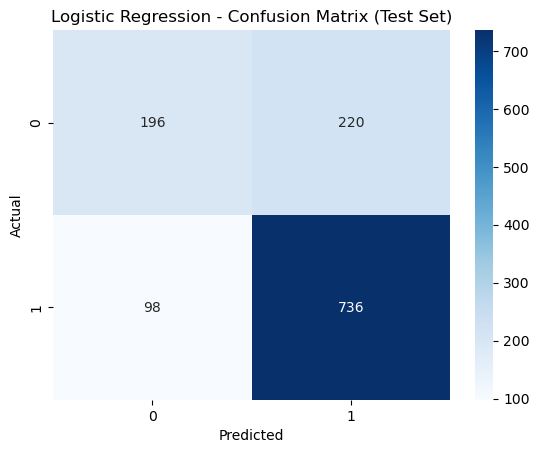


📋 Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.47      0.55       416
           1       0.77      0.88      0.82       834

    accuracy                           0.75      1250
   macro avg       0.72      0.68      0.69      1250
weighted avg       0.74      0.75      0.73      1250



In [92]:
# Predict on the testing data
y_predtest = log_reg.predict(X_test)

# Evaluate the model
cm_lgtest = confusion_matrix(y_test_binary, y_predtest)
sns.heatmap(cm_lgtest, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix (Test Set)')
plt.show()

print("\n📋 Classification Report:\n", classification_report(y_test_binary, y_predtest))

In [93]:
print("Accuracy :", accuracy_score(y_test_binary, y_predtest))
print("Precision :", precision_score(y_test_binary, y_predtest))
print("Recall :", recall_score(y_test_binary, y_predtest))

Accuracy : 0.7456
Precision : 0.7698744769874477
Recall : 0.882494004796163


<br>

# **11.2. Model 2 - KNN (Test Set)**

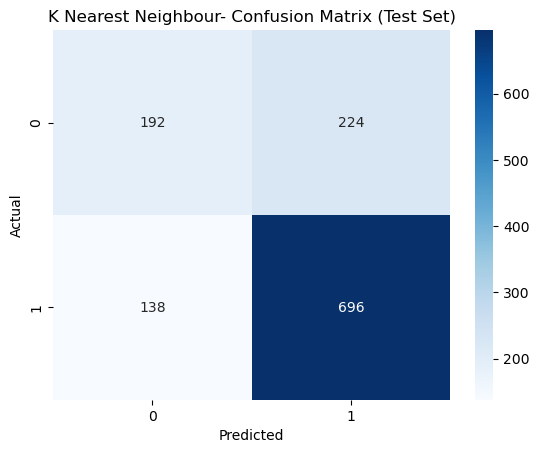

🔍 Accuracy on training set: 0.7104

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.46      0.51       416
           1       0.76      0.83      0.79       834

    accuracy                           0.71      1250
   macro avg       0.67      0.65      0.65      1250
weighted avg       0.70      0.71      0.70      1250



In [95]:
# Predict on the testing data
y_predtest = knn.predict(X_test)

# Evaluate
cm_knntest = confusion_matrix(y_test_binary, y_predtest)
sns.heatmap(cm_knntest, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K Nearest Neighbour- Confusion Matrix (Test Set)')
plt.show()

print("🔍 Accuracy on training set:", accuracy_score(y_test_binary, y_predtest))
print("\n📋 Classification Report:\n", classification_report(y_test_binary, y_predtest))

<br>

## **11.3. Model 3 - Random Forest Model (Test Set)**

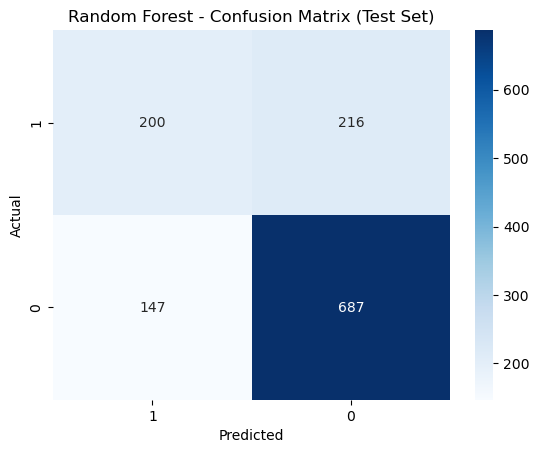


📋 Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.48      0.52       416
           1       0.76      0.82      0.79       834

    accuracy                           0.71      1250
   macro avg       0.67      0.65      0.66      1250
weighted avg       0.70      0.71      0.70      1250



In [97]:
# Predict on testing data
y_test_pred_rf = rf.predict(X_test)
y_test_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate
acc = accuracy_score(y_test_binary, y_test_pred_rf)
roc = roc_auc_score(y_test_binary, y_test_proba_rf)

# Confusion Matrix
cm_rftest= confusion_matrix(y_test_binary, y_test_pred_rf)
sns.heatmap(cm_rftest, annot=True, fmt='d', cmap='Blues', xticklabels=[1,0],yticklabels=[1,0])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix (Test Set)')
plt.show()

# Classification Report
print("\n📋 Classification Report:\n", classification_report(y_test_binary, y_test_pred_rf))

<br>

# **THE END**